In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-matrixfree-deblur)

We repeat the earlier process to blur an original image $\mathbf{X}$ to get $\mathbf{Z}$.

In [2]:
load mandrill
[m, n] = size(X);
v = [1/4, 1/2, 1/4];
B = spdiags(v, -1:1, m, m);
C = spdiags(v, -1:1, n, n);
blur = @(X) B^12 * X * C^12;

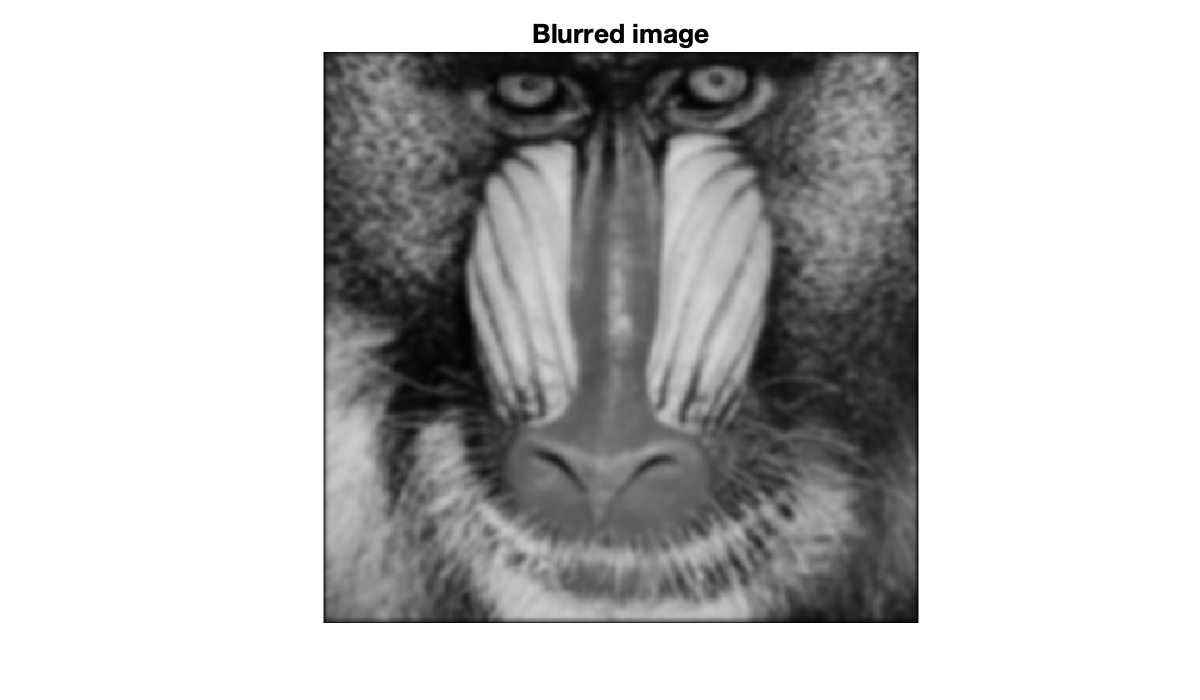

In [3]:
Z = blur(X);
clf,  imshow(Z, [0, 255])
title(("Blurred image"));

Now we imagine that $\mathbf{X}$ is unknown and that we want to recover it from $\mathbf{Z}$. We first need functions that translate between vector and matrix representations.

In [4]:
vec = @(X) reshape(X,m*n,1);
unvec = @(x) reshape(x,m,n);
T = @(x) vec( blur(unvec(x)) );

The blurring operators are symmetric, so we apply `minres` to the composite blurring transformation `T`.

gmres(50) converged at outer iteration 2 (inner iteration 45) to a solution with relative residual 1e-05.


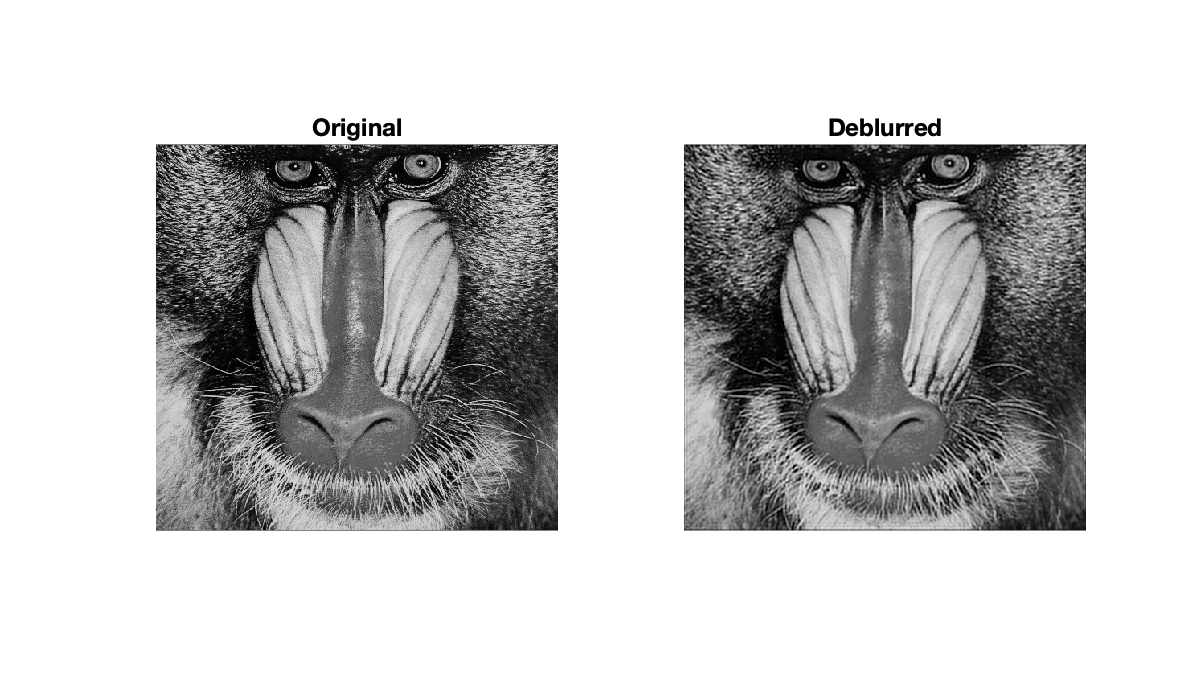

In [5]:
y = gmres(T, vec(Z), 50, 1e-5);
Y = unvec(y);

subplot(121)
imshow(X, [0, 255])
title("Original")
subplot(122)
imshow(Y, [0, 255])
title(("Deblurred"));